In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as sps
from sklearn.datasets import load_iris
%matplotlib inline

# download iris
size = 50
sample_all = load_iris()["data"]
target = load_iris()["target"]
# separate sample
sample = [sample_all[i*size:(i+1)*size] for i in range(3)]


In [2]:
def calc_mean(axis , sample):
        mean = [sample.mean(axis = 0)[axis[i]]
                for i in range(len(axis))]
        return mean
    
def calc_cov(axis , sample , mean) :
        X = np.matrix([[sample[i][axis[j]] - mean[j] 
                        for j in range(len(axis))] 
                       for i in range(size)])
        cov = 1.0/size * (X.T*X)
        return cov.tolist() 
    
# all dimensions
axis = [[0,1],[1,3],[2,3]]
# mean [dimension][sample]
emean = np.array([[calc_mean(axis[i_dim],sample[j_smp]) 
                   for j_smp in range(3)] 
                  for i_dim in range(3)])
# cov[dimension][sample]
ecov = np.array([[(calc_cov(axis[i_dim],sample[j_smp],
                            emean[i_dim][j_smp])) 
                  for j_smp in range(3)] 
                 for i_dim in range(3)])

In [3]:
bx = [-1,8] # OX bounds
by = [-1,5] # OY bounds
def build_plot(mean, cov, distr, dim, nsample, sample) :
    step = 0.05
    plt.figure(figsize=(11,7))
    grid = np.mgrid[bx[0]:bx[1]+step:step, by[0]:by[1]+step:step]
    density = np.array([[distr.pdf((grid[0, i, j], grid[1, i, j]))
                         for j in range(grid[0].shape[1])]
                        for i in range(grid[0].shape[0])])
    
    plt.contour(grid[0], grid[1], density,alpha = 0.95)
    plt.plot(sample[:,dim[0]] , sample[:,dim[1]],"*r",alpha = 0.7)
    plt.xlim((bx[0],bx[1]))
    plt.ylim((by[0],by[1]))
    plt.xlabel("axis: " + str(dim[0]))
    plt.ylabel("axis: " + str(dim[1]))
    plt.grid()
    plt.title("dimensions : " + str(axis[i_dim])  
              + ",   sample :" + str(nsample))
    plt.show()

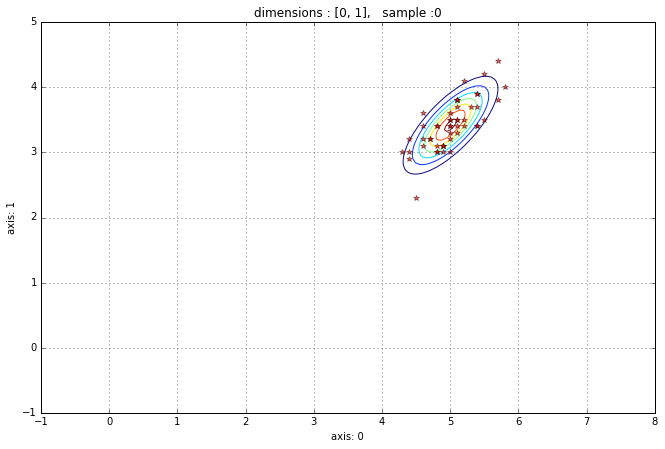

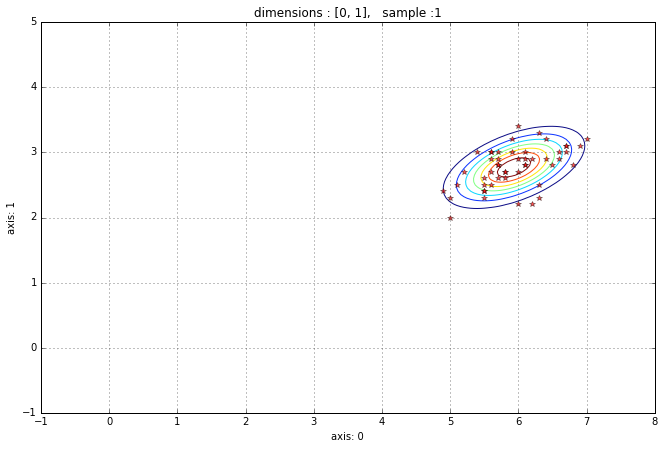

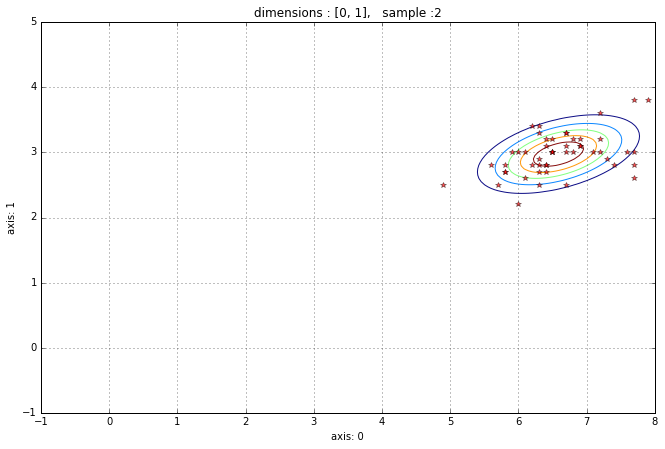

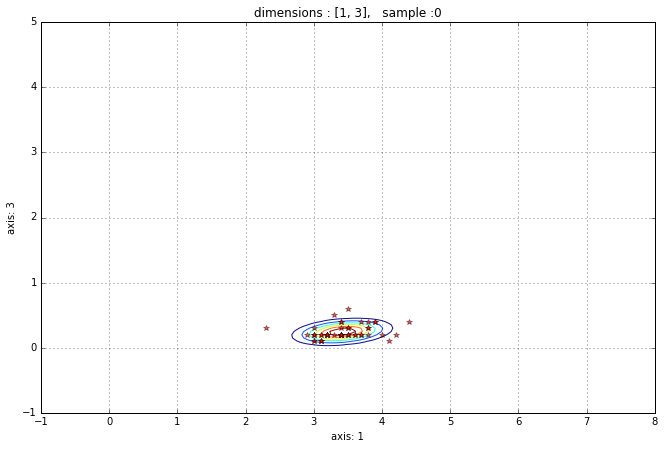

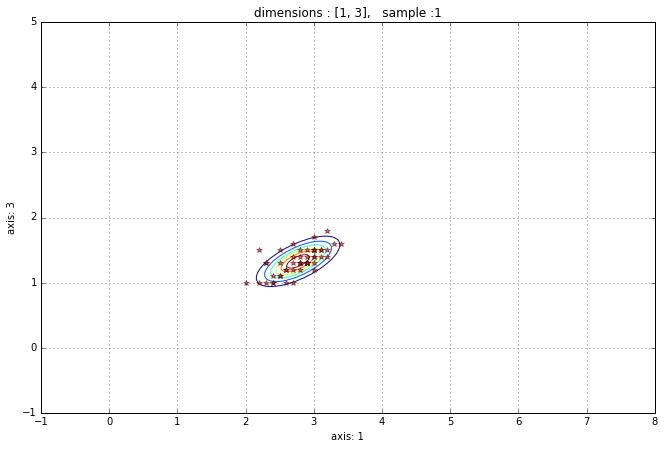

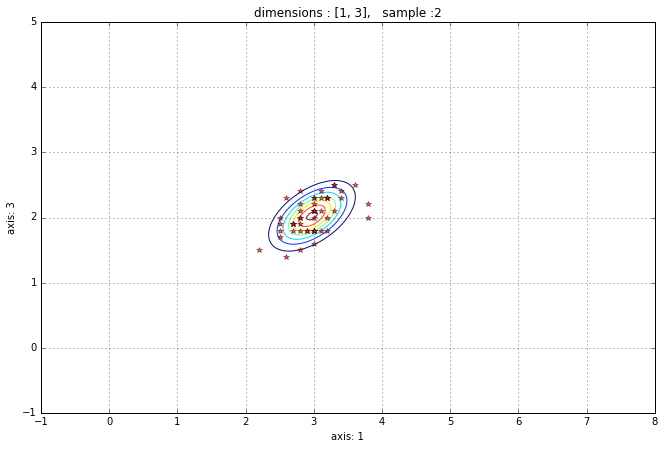

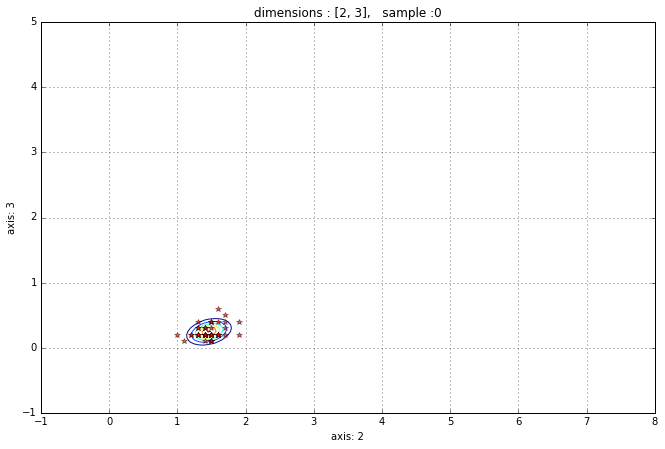

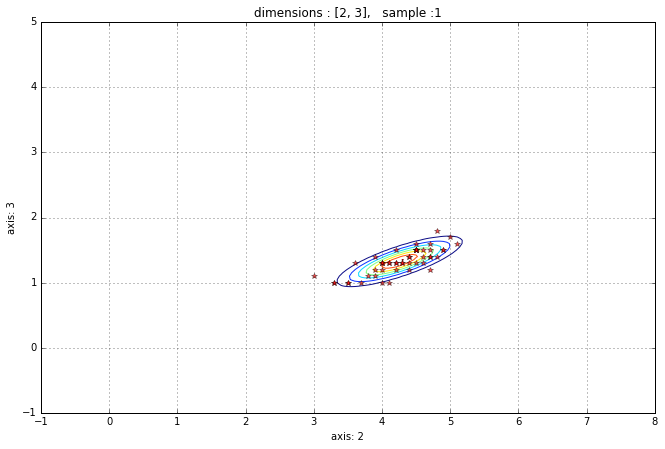

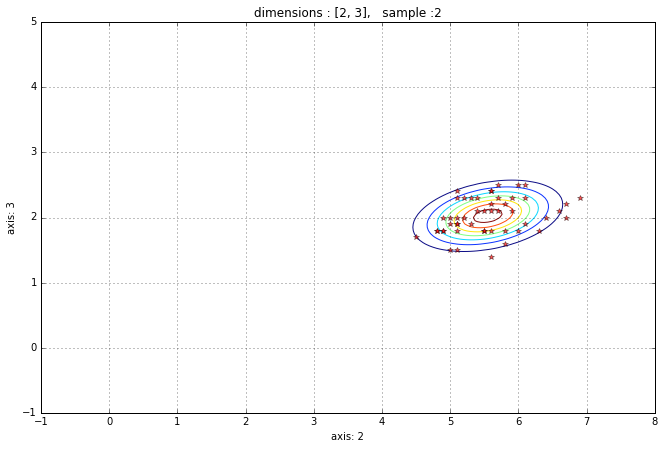

In [31]:
distr = [[sps.multivariate_normal(emean[i_dim][j_smp] ,
                                  ecov[i_dim][j_smp])
          for j_smp in range(3)] 
         for i_dim in range(3)] 

for i_dim in range(len(axis)):
    for n_sample in range(len(sample)) :
        build_plot(mean=emean[i_dim][n_sample],
                   cov=ecov[i_dim][n_sample],
                   distr=distr[i_dim][n_sample],
                   dim=axis[i_dim],
                   nsample=n_sample,
                   sample=sample[n_sample])
        

In [4]:
prob = [len([1 for t in target if k == t]) / len(target) 
        for k in range(3)]
for i in range(3) :
    print("P(T = %d) = %.3f" % (i , prob[i]))

P(T = 0) = 0.333
P(T = 1) = 0.333
P(T = 2) = 0.333


$E(X|I\{T = k \} = 0) = E(X|I\{T = k \})|_{I\{T = k\} = 0}$ 

$E(X|I\{T = k \}) = \frac{E(xI\{T=k\})}{P(T = k)} + \frac{E(xI\{T \neq k \})}{P(T \neq k)}$

$ \implies E(X|I\{T = k \} = 0) = \frac{3}{2}E(xI\{T \neq k \})$

In [5]:
exp_axis = [[1,2] , [0,2] , [0,1]]
cond_exp = [0.5 * (sample[axis[0]].mean(0) + sample[axis[1]].mean(0)) 
            for axis in exp_axis]
for i in range(3) :
    print("E(X|T != %d) = %s" % (i , cond_exp[i]))

E(X|T != 0) = [ 6.262  2.872  4.906  1.676]
E(X|T != 1) = [ 5.797  3.196  3.508  1.135]
E(X|T != 2) = [ 5.471  3.094  2.862  0.785]


Найдем условную плотность :
    $p_{(X \mid I\{T \neq k\})}(x \mid 1)$

пусть $(k_1,k_2,k_3) \in S_3$ (перестановка из множества $\{1,2,3\})$

б.о.о $k = k_1$

$p_{(X \mid I\{T \neq k_1\})}(x \mid 1) = \frac{p_{(X , I \{T \neq k_1\})}(X,1)}{p_{I\{T \neq k_1\} }(1)} \
= \frac{P(T = k_2)p_{k_2}(x) + P(T = k_3)p_{k_3}(x)}{P(I\{T \neq k_1\} = 1)} = \ 
\frac{3}{2}(\frac{1}{3}(p_{k_2}(x) + p_{k_3}(x)))$

$ p_{(X \mid I\{T \neq k_1\})}(x \mid 1) = \frac{p_{k_2}(x) + p_{k_3}(x)}{2}$

In [14]:
def get_cond_density(i_dim , neq_k) :
    step = 0.05
    plt.figure(figsize=(12,8))
    grid = np.mgrid[bx[0]:bx[1]+step:step, by[0]:by[1]+step:step]
    distr = np.array([sps.multivariate_normal(mean=emean[i_dim][k],
                                     cov=ecov[i_dim][k]) 
             for k in range(3) if k != neq_k])
    density = [[ 0.5 * np.sum([d.pdf((grid[0, i, j], grid[1, i, j])) 
                               for d in distr])
                         for j in range(grid[0].shape[1])]
                        for i in range(grid[0].shape[0])]
    
    return density , grid


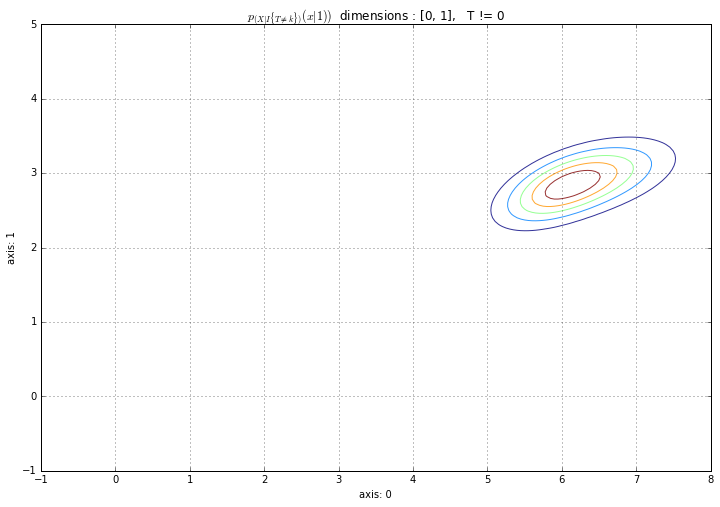

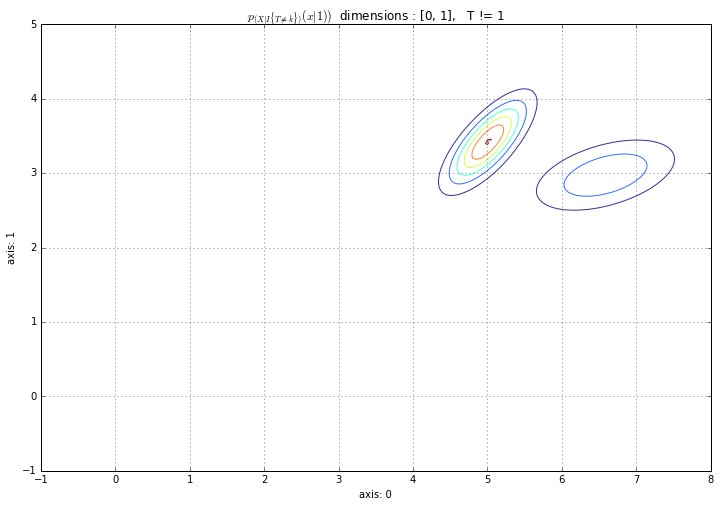

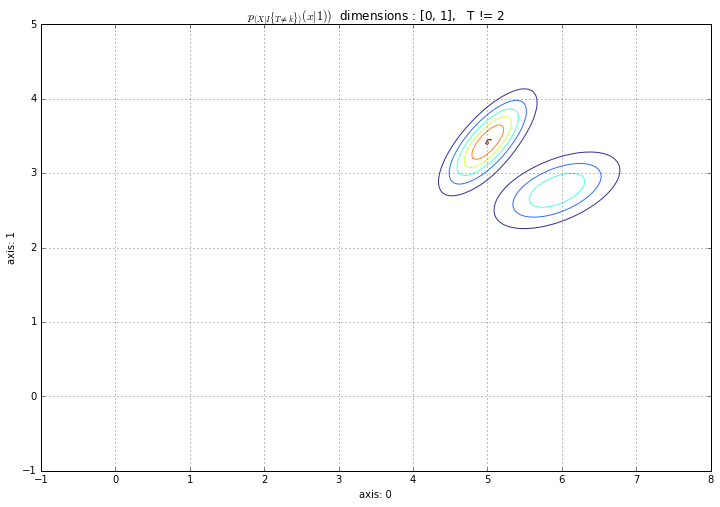

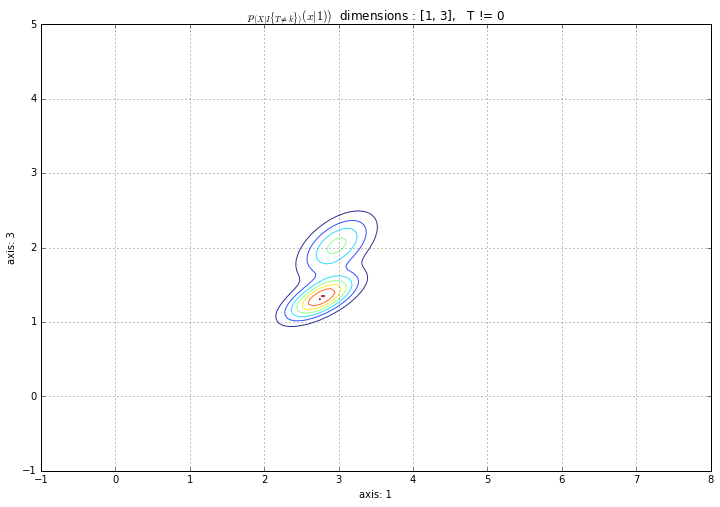

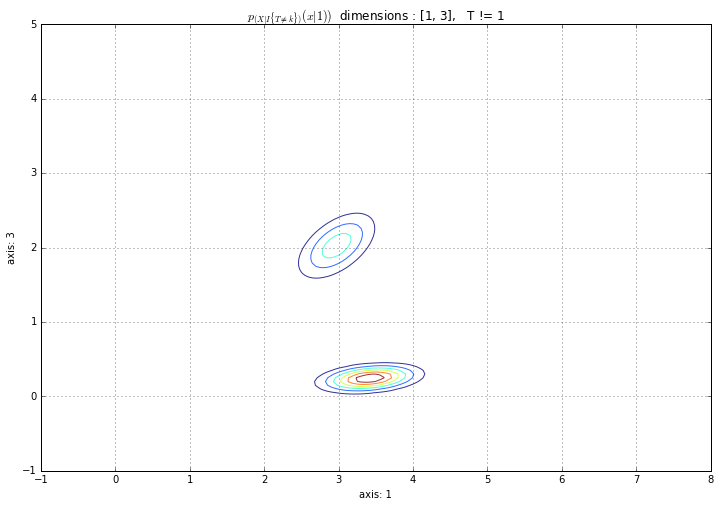

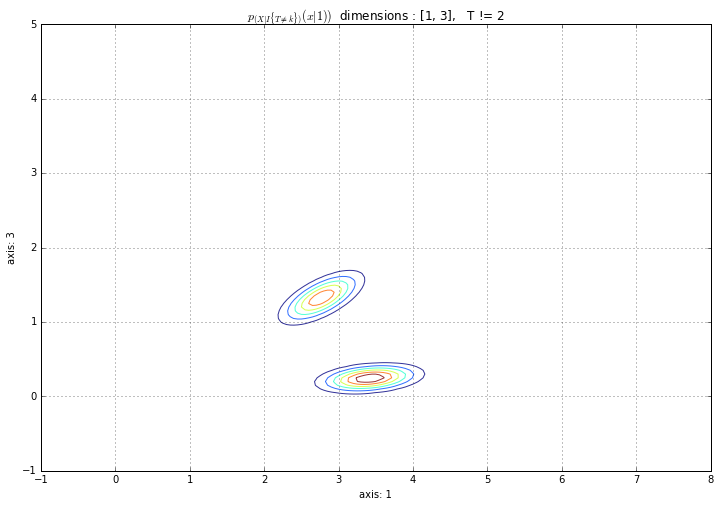

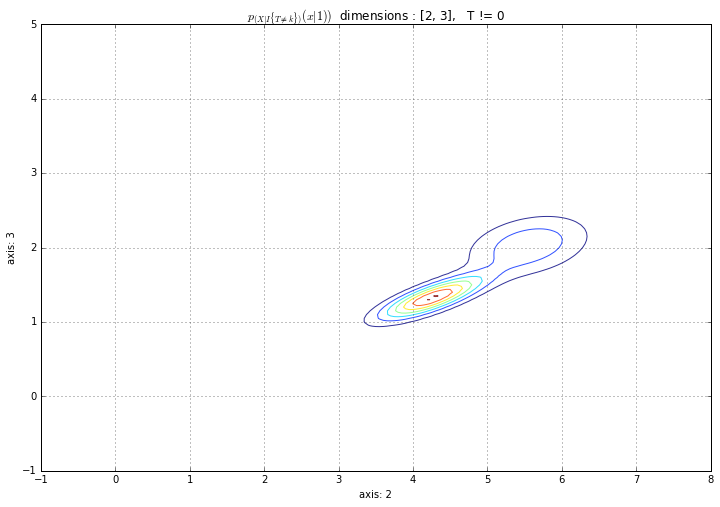

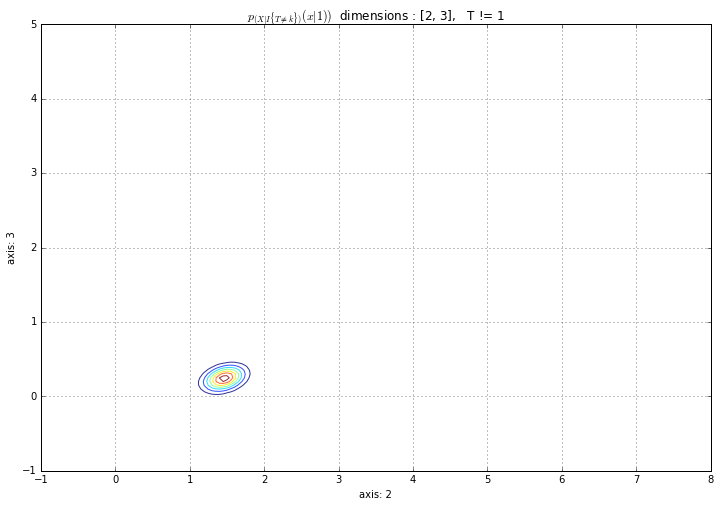

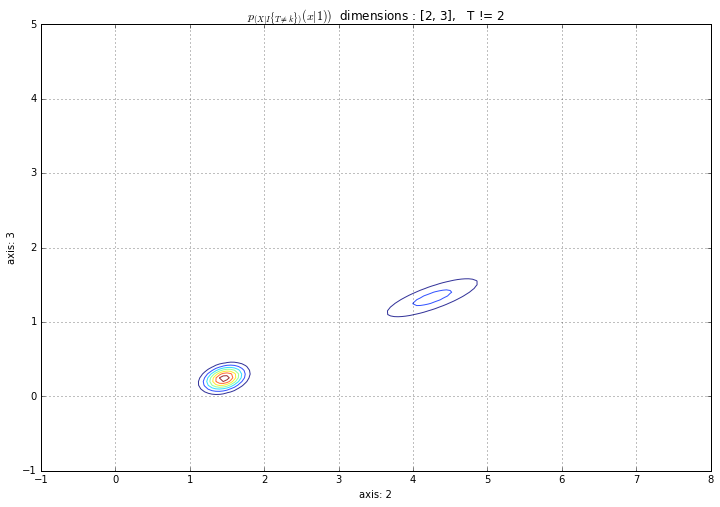

In [15]:
for i_dim in range(len(axis)) :
    for neq_k in range(3) :
        density , grid = get_cond_density(i_dim, neq_k)
        plt.contour(grid[0], grid[1], density,alpha = 0.8)
        plt.xlim((bx[0],bx[1]))
        plt.ylim((by[0],by[1]))
        plt.xlabel("axis: " + str(axis[i_dim][0]))
        plt.ylabel("axis: " + str(axis[i_dim][1]))
        plt.grid()
        plt.title(r'$p_{(X|I\{T \neq k\})}(x|1))$' 
                  + "  dimensions : " + str(axis[i_dim]) 
                  + ",   T != " + str(neq_k))
        plt.show()
        

In [8]:
#multi-dimensional expectation and covaration
exp_all = np.array([calc_mean(axis=[0,1,2,3] , sample=smp) for smp in sample])
cov_all = np.array([calc_cov(axis=[0,1,2,3] , sample=sample[i], mean=exp_all[i])
           for i in range(len(sample))])

In [17]:
def get_4d_class(x) :
    density_values = np.array([sps.multivariate_normal.pdf(x,mean=exp_all[n_smp],
                                                           cov=cov_all[n_smp])
                      for n_smp in range(len(sample))])
    return np.argmax(density_values)
    
def get_2d_class(x,i_dim) :
    density_values = np.array(
                     [sps.multivariate_normal.pdf(x,
                                                  mean=emean[i_dim][n_smp],
                                                  cov=ecov[i_dim][n_smp])
                               for n_smp in range(len(sample))])
    return np.argmax(density_values)

проведем классификацию $k = argmax_k[p_{X|I\{T=k\}}(x|1)]$ 

найдем $p_{(X \mid I\{T = k\})}(x \mid 1)$

$p_{(X \mid I\{T = k\})}(x \mid 1) = \frac{p_{(X , I \{T = k\})}(X,1)}{p_{I\{T = k\} }(1)} \
= \frac{P(T = k)p_k(x)}{P(I\{T = k\} = 1)} = p_k(x)$

$p_k(x)$ получим из соответствующих оценок матожиданий и ковариаций (4-х мерных и 2-х мерных соответственно)

In [10]:
classes4d = [get_4d_class(X) for X in sample_all]
mistakes_rate = len([1 for i in range(len(sample_all))
                     if classes4d[i] != target[i]]) / len(sample_all)
print("mistakes rate = " + str(mistakes_rate))

mistakes rate = 0.02


проведем аналогичную классификацию по проекциям на пары осей

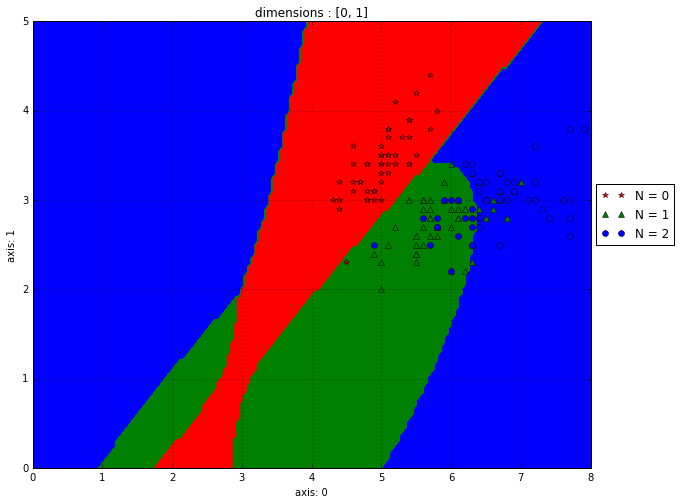

mistakes rate = 0.2


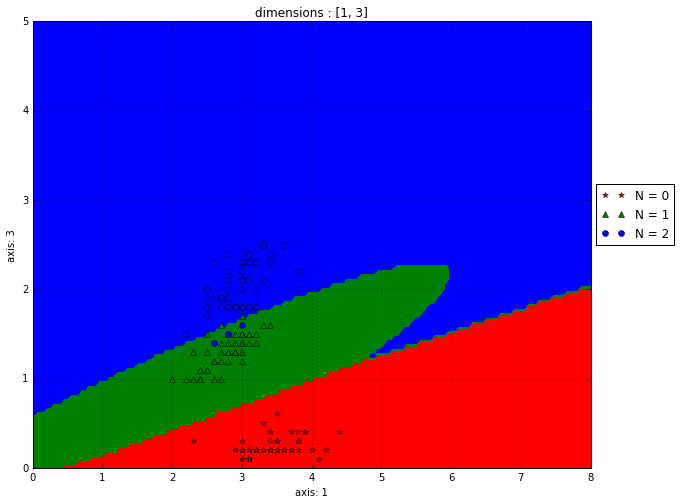

mistakes rate = 0.047


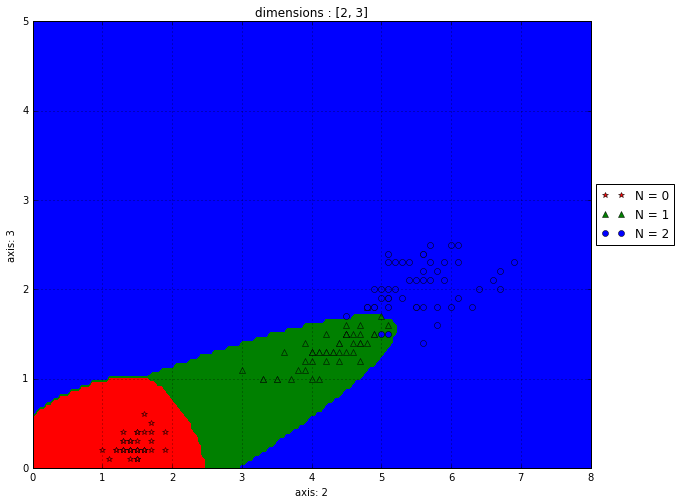

mistakes rate = 0.02


In [16]:
sample_colors = ['*r','^g','ob']
mcolors = ['r','g','b']
step = 0.05
for i_dim in range(len(axis)):
    #get sample classification
    classes2d = [get_2d_class([sample_all[i][axis[i_dim][0]],
                               sample_all[i][axis[i_dim][1]]], i_dim)
                 for i in range(len(sample_all))]
    mistakes_rate = len([1 for i in range(len(sample_all))
                         if classes2d[i] != target[i]]) / len(sample_all)

    grid = np.mgrid[0:bx[1] + step:step,0:by[1]+step:step]
    class_grid = np.array([[get_2d_class([grid[0, i, j], grid[1, i, j]] , i_dim)
                            for j in range(grid[0].shape[1])]
                           for i in range(grid[0].shape[0])])
    
    
    
    plt.figure(figsize=(10,8))

    im = plt.contourf(grid[0],grid[1],class_grid,levels=[-0.5,0.5,1.5,2.5],
                      colors=mcolors)
    for i in range(3):
        plt.plot(sample[i][:,axis[i_dim][0]],sample[i][:,axis[i_dim][1]],
                 sample_colors[i], label = "N = " + str(i))
        
    plt.xlim((0,bx[1]))
    plt.ylim((0,by[1]))
    plt.legend(loc=(1.01,0.5))
    plt.xlabel("axis: " + str(axis[i_dim][0]))
    plt.ylabel("axis: " + str(axis[i_dim][1]))
    plt.grid()
    plt.title("dimensions : " + str(axis[i_dim]))
    plt.show()
    print("mistakes rate = " + str(round(mistakes_rate,3)))

Точность классификации по проекции на пару осей в общем случае хуже четырехмерной,

в данном случае наименьшая точность в проекциb на [0,1] (на порядок хуже).